# 📊 Tehran Rent Market Analysis (1403) – descriptive and exploratory analysis

##  Objective
The goal of this notebook is to summarize, visualize, and interpret key variables to uncover patterns, trends, and potential anomalies in the data.
## focuse on:
- Describe the distribution of critical numeric features: building_size, credit_value, rent_value, total_cost
- Identify the most and least frequent neighborhoods
- Visualize price trends and relationships between variables
- Detect possible outliers or unusual patterns

## Input
- Cleaned CSV file of rental listings (from previues phase) 

## Output
- At the end of this phase, feature engineering prepares the dataset for more effective clustering and prediction.

## Tools & Libraries
- Python
- Pandas
- Numpy
- Regular Expressions

✅ results of this stage guide the clustering and predictive modeling phases.


In [21]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import re

## prepare file
- read cleaned file and get rental dataframe to work

In [22]:
source_file=pd.read_csv(r"..\data\cleaned_data.csv",encoding='utf-8',low_memory=False)

In [23]:
source_file.rename(columns={"neighborhood_slug":"neighborhood","total_cost":"monthly_total_cost"},inplace=True)

## Describe the numeric columns with key indicators

In [27]:
numeric_cols=['building_size','monthly_total_cost',
       'building_age', 'cost_per_sqm',"rent_value","credit_value"]

In [28]:
from scipy.stats import skew, kurtosis
summary_stats=[]
for col in numeric_cols:
    data = source_file[col].dropna()
    summary_stats.append({
    "Feature": col,
    "Mean": data.mean(),
    "Median": data.median(),
    "Std": data.std(),
    "CV": data.std() / data.mean(),
    "Skewness": skew(data),
    "Kurtosis": kurtosis(data)
    })    


summary_df = pd.DataFrame(summary_stats)
summary_df.set_index("Feature", inplace=True)
display(summary_df)

,Mean,Median,Std,CV,Skewness,Kurtosis
Feature,,,,,,
building_size,8.761232e+01,8.000000e+01,3.497209e+01,0.399169,1.218316,2.455860
monthly_total_cost,3.712400e+07,3.383333e+07,2.194649e+07,0.591167,0.787071,-0.147442
building_age,1.345452e+01,1.300000e+01,8.779930e+00,0.652564,1.050846,1.755021
cost_per_sqm,4.209244e+05,3.910256e+05,1.960822e+05,0.465837,0.903971,1.334904
rent_value,1.951186e+07,1.500000e+07,1.576427e+07,0.807933,1.748675,3.273082
credit_value,4.259762e+08,4.000000e+08,2.563160e+08,0.601714,0.788833,-0.161461


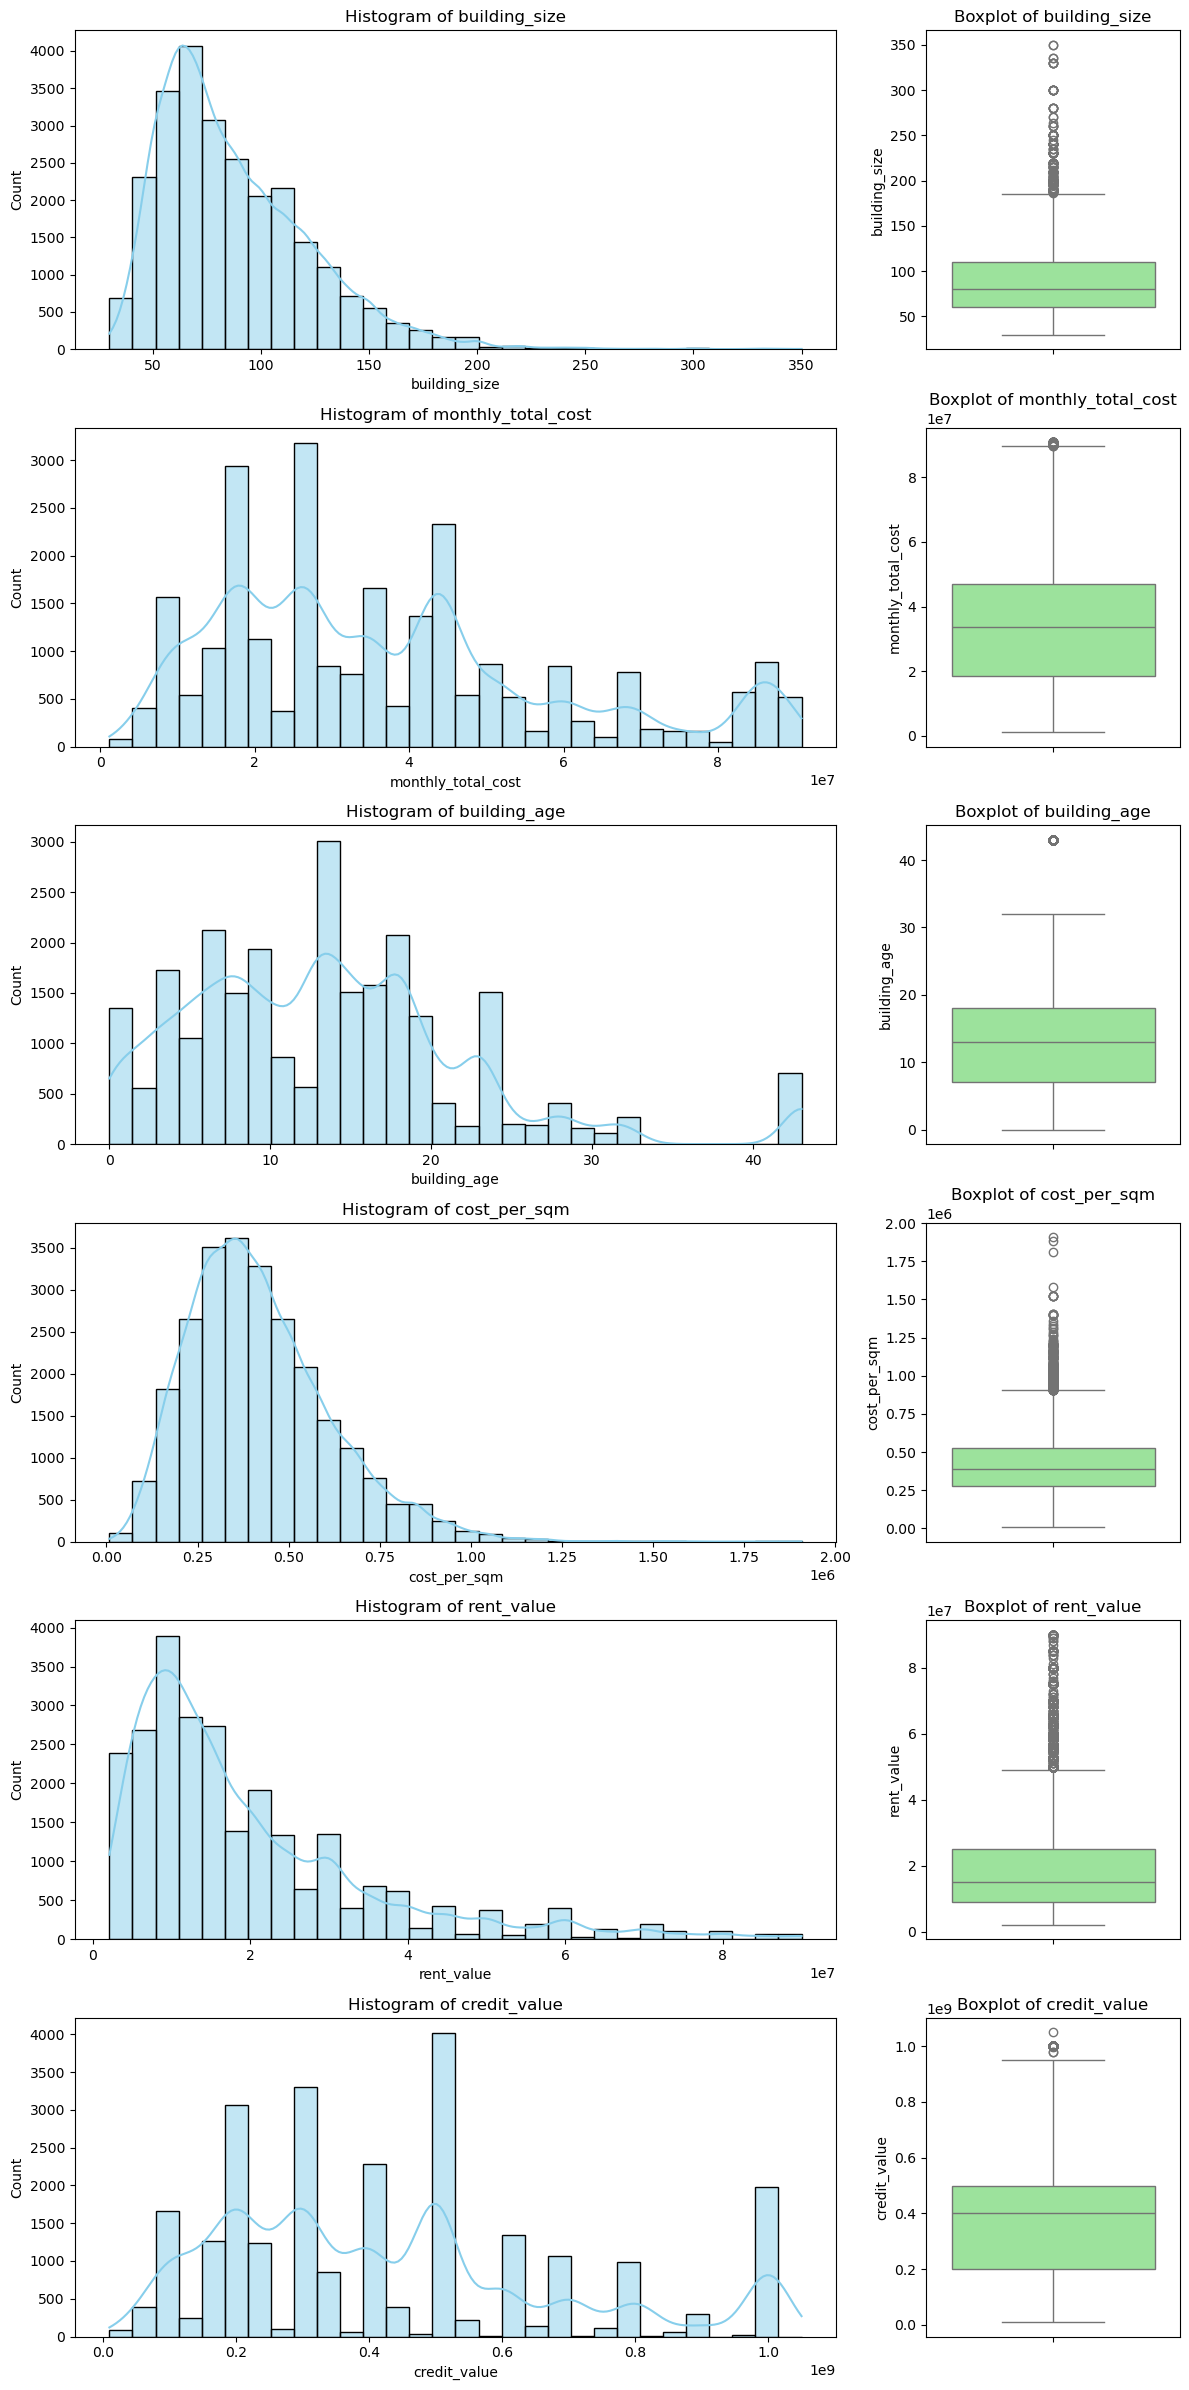

In [29]:
fig, axes = plt.subplots(
    nrows=len(numeric_cols), ncols=2,
    figsize=(12, 4*len(numeric_cols)),
    gridspec_kw={'width_ratios': [3,1]}
)
if len(numeric_cols) == 1:
    axes = [axes] 
for i,col in enumerate(numeric_cols):
    ax_hist, ax_box = axes[i]
    sb.histplot(data=source_file,x=col,
        bins=30,
        kde=True,
        color="skyblue",
        ax=ax_hist
    )
    ax_hist.set_title(f"Histogram of {col}")
    sb.boxplot(
    data=source_file,
    y=col,
    color="lightgreen",
    ax=ax_box
)
    ax_box.set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

## Results Explanation
For most features, the mean is higher than the median (except construction_year), which means the data are uneven. The housing market is very diverse, so all features show a lot of variation. The Coefficient of Variation (CV) is high for features like rent_value. Also, box plots show some outliers in cost_per_sqm and rent_value, meaning some listings are quite different from the rest and again this reflect the real diversity of the housing market rather than anomalies.

In the following mean and median indicators are compared across the 22 regions.

In [30]:
group_by_region=source_file.groupby("region").agg({"monthly_total_cost":["median","mean"]}).reset_index()

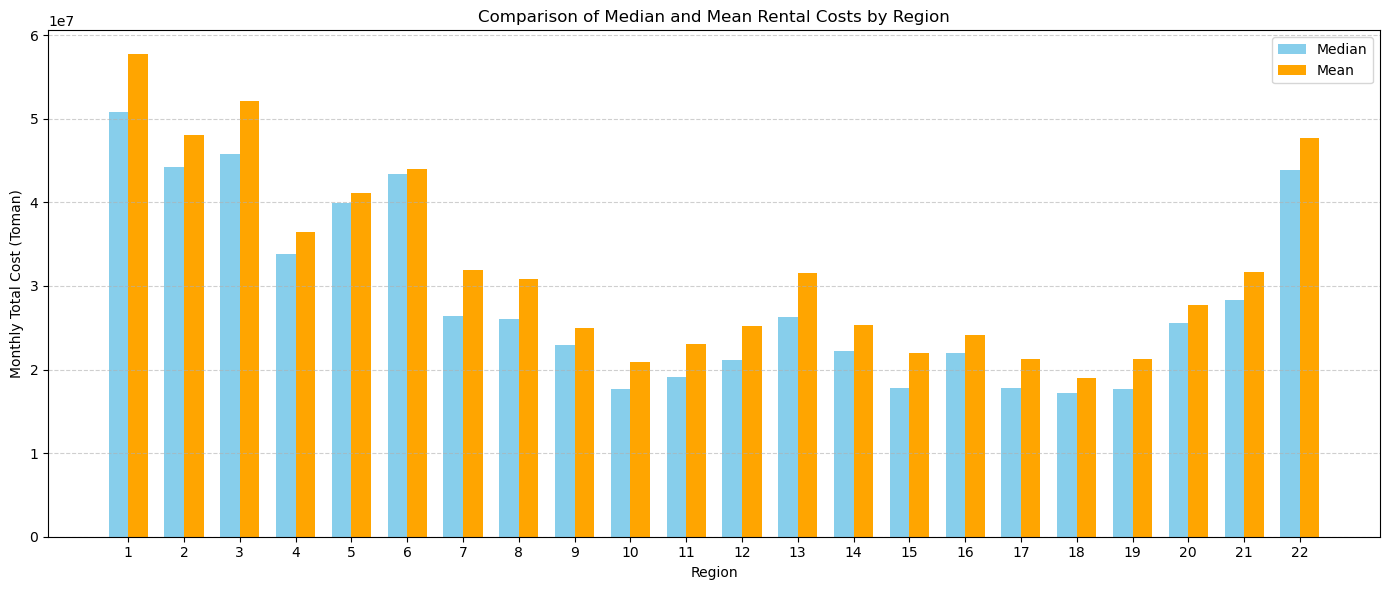

In [31]:
plt.figure(figsize=(14, 6))
bar_width = 0.35
x = group_by_region['region']

plt.bar(x - bar_width/2, group_by_region['monthly_total_cost']['median'], width=bar_width, label='Median', color='skyblue')
plt.bar(x + bar_width/2, group_by_region['monthly_total_cost']['mean'], width=bar_width, label='Mean', color='orange')

plt.xlabel('Region')
plt.ylabel('Monthly Total Cost (Toman)')
plt.title('Comparison of Median and Mean Rental Costs by Region')
plt.xticks(group_by_region['region'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Compare Expensive and Affordable Neighborhoods

In [32]:
most_expensive_neighborhoods=source_file.groupby(["neighborhood","region"])["monthly_total_cost"].median().sort_values(ascending=False).reset_index().head(5)
most_cheapest_neighborhoods=source_file.groupby(["neighborhood","region"])["monthly_total_cost"].median().sort_values(ascending=True).reset_index().head(5)

C:\Users\arezoo\AppData\Local\Temp\ipykernel_12464\913526685.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\arezoo\AppData\Local\Temp\ipykernel_12464\913526685.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


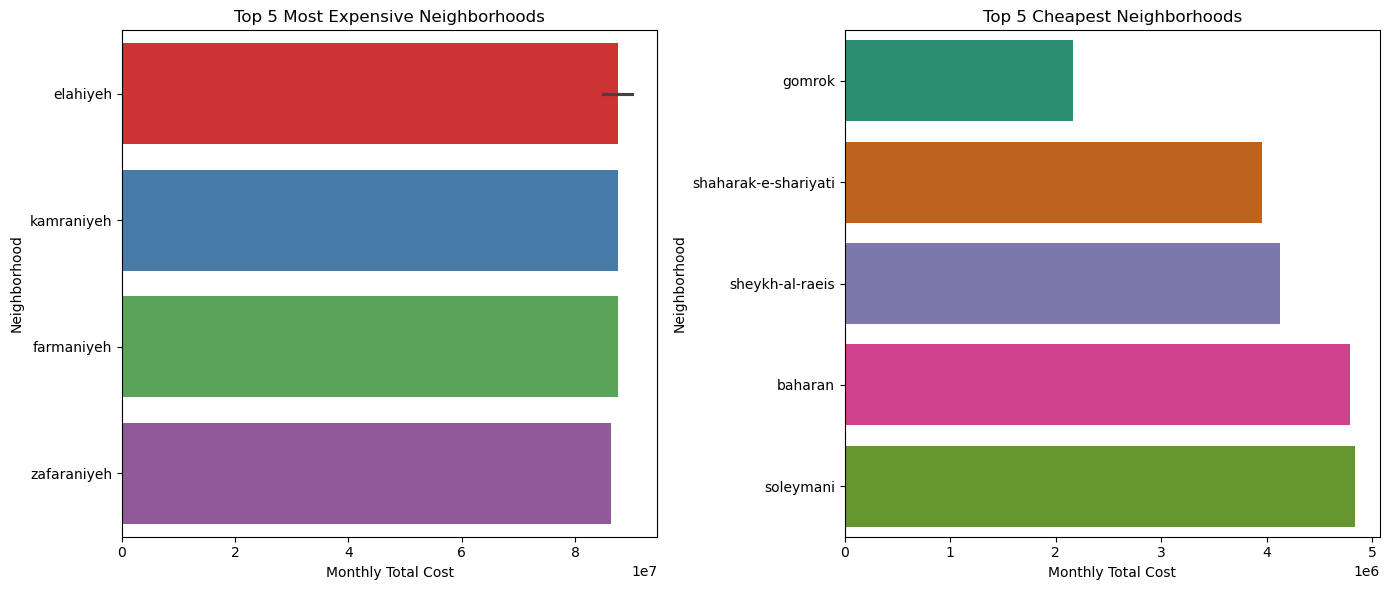

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=False)

sns.barplot(
    x="monthly_total_cost",
    y="neighborhood",
    data=most_expensive_neighborhoods,
    ax=axes[0],
    palette="Set1"
)
axes[0].set_title("Top 5 Most Expensive Neighborhoods")
axes[0].set_xlabel("Monthly Total Cost")
axes[0].set_ylabel("Neighborhood")

sns.barplot(
    x="monthly_total_cost",
    y="neighborhood",
    data=most_cheapest_neighborhoods,
    ax=axes[1],
    palette="Dark2"
)
axes[1].set_title("Top 5 Cheapest Neighborhoods")
axes[1].set_xlabel("Monthly Total Cost")
axes[1].set_ylabel("Neighborhood")
plt.tight_layout()
plt.show()

## Compare Expensive and Affordable Regions

In [34]:
most_expensive_regions=source_file.groupby("region")["monthly_total_cost"].median().sort_values(ascending=False).reset_index().head(5)
most_cheapest_regions=source_file.groupby("region")["monthly_total_cost"].median().sort_values(ascending=True).reset_index().head(5)

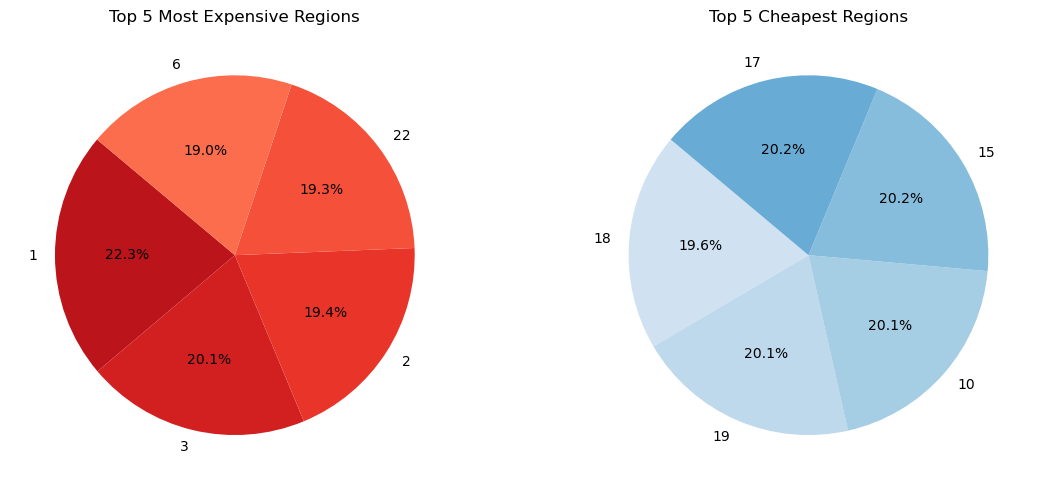

In [35]:
exp_labels=most_expensive_regions["region"]
exp_sizes =most_expensive_regions["monthly_total_cost"]
cheap_labels=most_cheapest_regions["region"]
cheap_sizes =most_cheapest_regions["monthly_total_cost"]
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].pie(
    exp_sizes, 
    labels=exp_labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Reds_r(range(50, 50+len(exp_labels)*20, 20))
)
axes[0].set_title("Top 5 Most Expensive Regions")
axes[1].pie(
    cheap_sizes, 
    labels=cheap_labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=plt.cm.Blues(range(50, 50+len(cheap_labels)*20, 20))
)
axes[1].set_title("Top 5 Cheapest Regions")

plt.tight_layout()
plt.show()

## Compare Seasons by Total cost

In [36]:
expensive_season= source_file.groupby("season")["monthly_total_cost"].median().sort_values(ascending=False).reset_index()

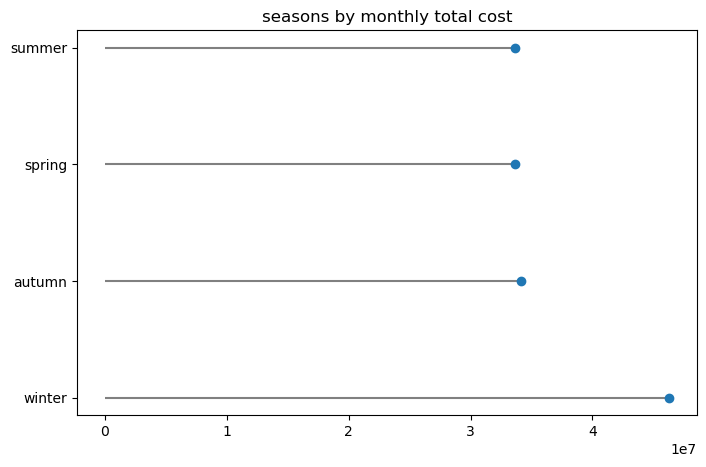

In [37]:
plt.figure(figsize=(8,5))
plt.hlines(y=expensive_season["season"], xmin=0, xmax=expensive_season["monthly_total_cost"], color='gray')
plt.plot(expensive_season["monthly_total_cost"], expensive_season["season"], "o")
plt.title("seasons by monthly total cost")
plt.show()

## Compare Regions By Ads Counts And Monthly Total Cost 

In [40]:
summary = source_file.groupby("region").agg({"monthly_total_cost":"median","id":"count"}).reset_index()
summary.columns = ["region", "monthly_total_cost", "ad_counts"]

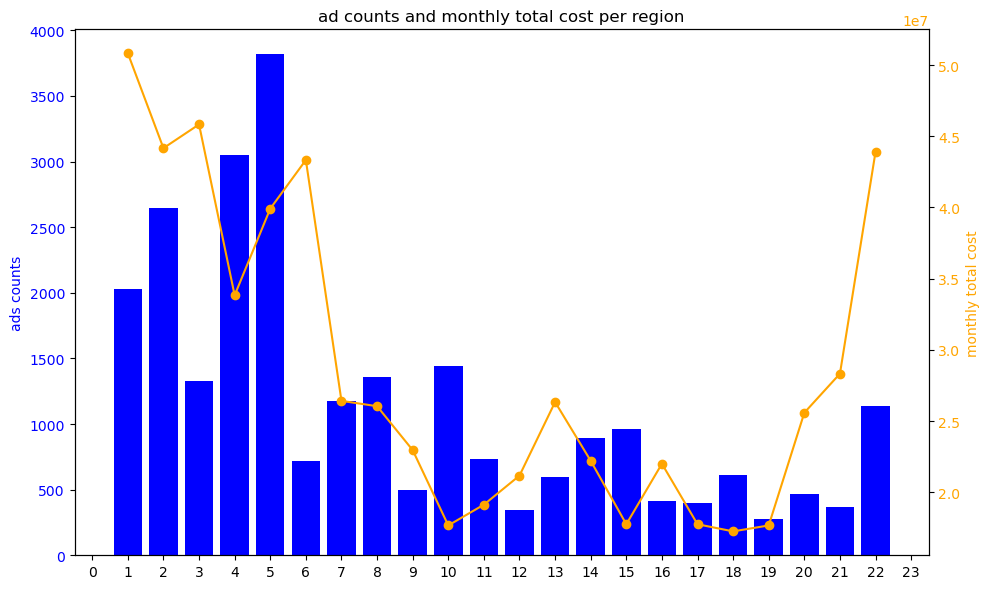

In [41]:
from matplotlib.ticker import MultipleLocator
fig, ax1 = plt.subplots(figsize=(10,6))


ax1.bar(summary['region'].to_numpy(), summary['ad_counts'].to_numpy(), color='blue', label='تعداد آگهی')
ax1.set_ylabel('ads counts', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.xaxis.set_major_locator(MultipleLocator(1))

ax2 = ax1.twinx()
ax2.plot(summary['region'].to_numpy(), summary['monthly_total_cost'].to_numpy(), color='orange', marker='o', label='تعداد محله')
ax2.set_ylabel('monthly total cost', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')


plt.title("ad counts and monthly total cost per region")
fig.tight_layout()
plt.show()

## Results Explanation
The relationship between ad counts and monthly total cost reflects market demand across the 22 regions. Some regions, such as 1, 3, and 6, have high costs despite relatively few ads, while others show a large number of ads with lower costs. There are also regions with both low ad counts and low costs, indicating weaker demand.